In [1]:
import logging

import os
import sys
root_dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))
sys.path.append(root_dir)

import numpy as np
import pandas as pd

from importlib import reload

from memory import garbage_collect

log = lambda msg: logging.info(msg)


# Load data

In [39]:
from sleep_events import load_days_data

day_data = load_days_data(True)
day_data.index = day_data['dayAndNightOf']

# What happens to LEP when I do nothing good for it?
No clear pattern.

In [53]:
[c for c in day_data.columns if 'LEP' in c]


['circadian:basic:entries:LEP:temp',
 'circadian:basic:entries:LEP:datetimeSSM',
 'circadian:basic:entries:LEP:prominence',
 'circadian:basic:entries:LEP:temp:vsDayMinus1',
 'circadian:basic:entries:LEP:temp:onDayMinus1',
 'circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1',
 'circadian:basic:entries:LEP:datetimeSSM:onDayMinus1',
 'circadian:basic:entries:LEP:prominence:vsDayMinus1',
 'circadian:basic:entries:LEP:prominence:onDayMinus1',
 'circadian:combined:entries:LEP:temp',
 'circadian:combined:entries:LEP:datetimeSSM',
 'circadian:combined:entries:LEP:prominence',
 'circadian:combined:entries:LEP:minsSinceReadyToSleep',
 'circadian:combined:entries:LEP:minsUntilWake',
 'circadian:combined:entries:LEP:minsSinceSleep',
 'circadian:combined:entries:LEP:minsSinceSunsetEnd',
 'circadian:combined:entries:LEP:minsSinceSunriseEnd',
 'circadian:combined:entries:LEP:temp:vsDayMinus1',
 'circadian:combined:entries:LEP:temp:onDayMinus1',
 'circadian:combined:entries:LEP:datetimeSSM:vsDayMinu

In [62]:
mask_no_evening_shower = (day_data['events:shower:count'] == 0) | (day_data['events:shower:lastSSM'] < 19 * 3600)
mask_has_evening_shower = (day_data['events:shower:count'] > 0) & (day_data['events:shower:lastSSM'] >= 19 * 3600)
mask_no_luminette = (day_data['events:luminette:count'] == 0)
mask_has_luminette = (day_data['events:luminette:count'] > 0)
mask_no_morning_light = (day_data['sunExposure:sunlightBeforeMiddaySecs'] < 5 * 60)
mask_some_morning_light = (day_data['sunExposure:sunlightBeforeMiddaySecs'] > 5 * 60)
mask_has_lep = day_data['circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1'].notna()

combined_mask = mask_no_evening_shower & mask_no_luminette & mask_no_morning_light

matching_days = day_data[combined_mask]
matching_days_with_lep = matching_days[mask_has_lep]
matching_days_with_lep['circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1'] / 60


C:\Users\graha\AppData\Local\Temp\ipykernel_5344\3096531974.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matching_days_with_lep = matching_days[mask_has_lep]


dayAndNightOf
2024-09-10    44.0
2024-09-16    -4.0
2024-09-27     6.0
2024-09-28    -4.0
2024-10-02    -4.0
2024-10-23    66.0
2024-10-30    72.0
2024-11-08   -10.0
2024-11-23   -18.0
2024-12-22   -32.0
2024-12-29   -18.0
2025-01-06    34.0
2025-01-07   -34.0
2025-01-08    48.0
2025-01-13    14.0
2025-01-19   -12.0
2025-01-21    16.0
2025-01-22   -20.0
2024-10-14   -28.0
2024-10-15    48.0
2025-02-17    24.0
2025-03-27    14.0
Name: circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1, dtype: float64

In [59]:
# Double-check specific days
day = day_data[day_data['dayAndNightOf'] == '2025-03-27']
day[['events:shower:count', 'events:shower:lastSSM', 'events:luminette:count', 'sunExposure:sunlightBeforeMiddaySecs', 'circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1', 'circadian:basic:entries:LEP:datetimeSSM']]

,events:shower:count,events:shower:lastSSM,events:luminette:count,sunExposure:sunlightBeforeMiddaySecs,circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1,circadian:basic:entries:LEP:datetimeSSM
dayAndNightOf,,,,,,
2025-03-27,0.0,NaN,0,180.0,840.0,76800.0


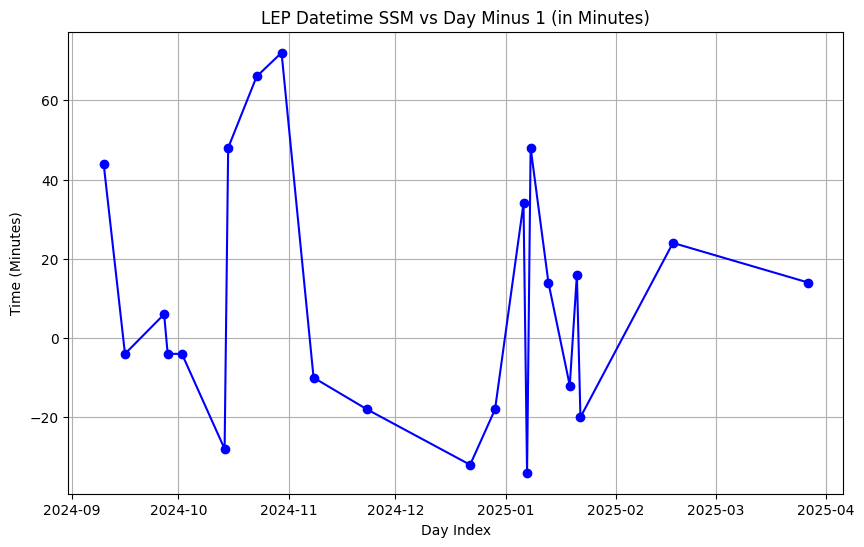

In [63]:
import matplotlib.pyplot as plt

# Calculate the values to plot
values = matching_days_with_lep.sort_index()['circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1'] / 60

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(values, marker='o', linestyle='-', color='b')
plt.title('LEP Datetime SSM vs Day Minus 1 (in Minutes)')
plt.xlabel('Day Index')
plt.ylabel('Time (Minutes)')
plt.grid(True)
plt.show()

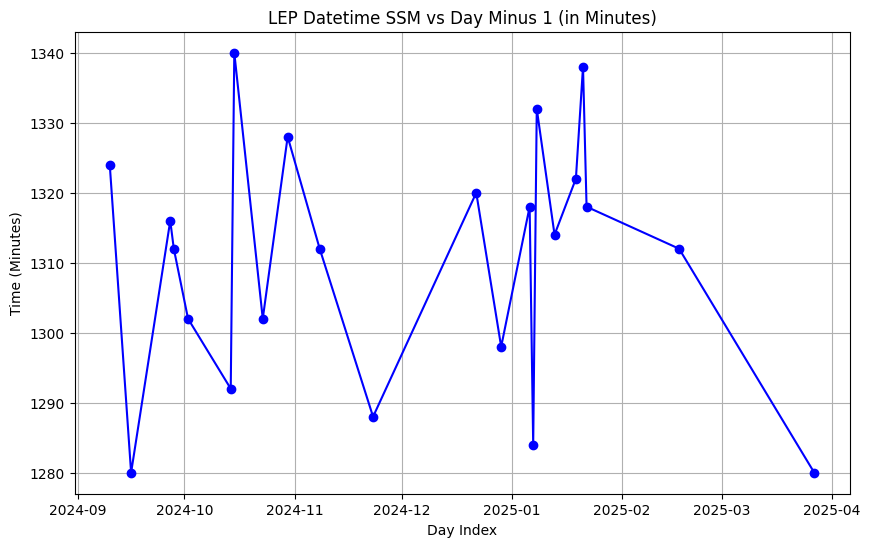

In [64]:
import matplotlib.pyplot as plt

# Calculate the values to plot
values = matching_days_with_lep.sort_index()['circadian:basic:entries:LEP:datetimeSSM'] / 60

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(values, marker='o', linestyle='-', color='b')
plt.title('LEP Datetime SSM vs Day Minus 1 (in Minutes)')
plt.xlabel('Day Index')
plt.ylabel('Time (Minutes)')
plt.grid(True)
plt.show()

# If only do luminette

In [65]:
combined_mask = mask_no_evening_shower & mask_has_luminette & mask_no_morning_light

matching_days = day_data[combined_mask]
matching_days_with_lep = matching_days[mask_has_lep]
matching_days_with_lep['circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1'] / 60


C:\Users\graha\AppData\Local\Temp\ipykernel_5344\4151709961.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matching_days_with_lep = matching_days[mask_has_lep]


dayAndNightOf
2025-03-01    -44.0
2025-03-16   -102.0
2025-03-12    -14.0
2025-03-19     58.0
2025-04-03     -6.0
2025-04-15      8.0
2025-04-16    -12.0
2025-04-17     40.0
Name: circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1, dtype: float64

In [41]:
# Double-check specific days
day = day_data[day_data['dayAndNightOf'] == '2025-04-16']
day[['events:shower:count', 'events:shower:lastSSM', 'events:luminette:count', 'sunExposure:sunlightBeforeMiddaySecs', 'circadian:combined:entries:LEP:datetimeSSM:vsDayMinus1', 'circadian:combined:entries:LEP:datetimeSSM:vsDayMinus1']]

,events:shower:count,events:shower:lastSSM,events:luminette:count,sunExposure:sunlightBeforeMiddaySecs,circadian:combined:entries:LEP:datetimeSSM:vsDayMinus1,circadian:combined:entries:LEP:datetimeSSM:vsDayMinus1
dayAndNightOf,,,,,,
2025-04-16,0.0,NaN,1,180.0,NaN,NaN


In [66]:
# More relaxed - drop shower need
combined_mask = mask_has_luminette & mask_no_morning_light

matching_days = day_data[combined_mask]
matching_days_with_lep = matching_days[mask_has_lep]
matching_days_with_lep['circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1'] / 60


C:\Users\graha\AppData\Local\Temp\ipykernel_5344\2621200083.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matching_days_with_lep = matching_days[mask_has_lep]


dayAndNightOf
2025-03-02     42.0
2025-03-01    -44.0
2025-03-16   -102.0
2025-03-12    -14.0
2025-03-19     58.0
2025-03-29     -8.0
2025-04-03     -6.0
2025-04-15      8.0
2025-04-16    -12.0
2025-04-17     40.0
Name: circadian:basic:entries:LEP:datetimeSSM:vsDayMinus1, dtype: float64